In [50]:
from main import DataLoader
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [51]:
#%matplotlib notebook

In [52]:
#Load the CSV file from previous project
#set a variable for the file location

finalphysician_file = "Output/final_physician_data.csv"
final_physician = pd.read_csv(finalphysician_file)
final_physician.head()



,NPI,Individual Pac ID,Last Name,First Name,Gender,Medical School,Graduation Yr,Primary Speciality,Organization Name,Organization Pac ID,...,Address ln 2,ln_2_sprs,City,State,Zip,Phone No.,Quality Category Score,ACI Category Score,IA Category Score,Final MIPS Score
0,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,NaN,GLENVIEW,IL,600261301,NaN,92.6,100.0,40.0,95.6
1,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,Y,GLENVIEW,IL,600261301,NaN,92.6,100.0,40.0,95.6
2,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,NaN,HIGHLAND PARK,IL,600352433,8.474328e+09,92.6,100.0,40.0,95.6
3,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,NaN,HIGHALND PARK,IL,600352433,NaN,92.6,100.0,40.0,95.6
4,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,Y,EVANSTON,IL,602011718,NaN,92.6,100.0,40.0,95.6


In [53]:
final_physician.columns

Index(['NPI', 'Individual Pac ID', 'Last Name', 'First Name', 'Gender',
       'Medical School', 'Graduation Yr', 'Primary Speciality',
       'Organization Name', 'Organization Pac ID', 'No. Org Memebers',
       'Address ln 1', 'Address ln 2', ' ln_2_sprs', 'City', 'State', 'Zip',
       'Phone No.', 'Quality Category Score', 'ACI Category Score',
       'IA Category Score', 'Final MIPS Score'],
      dtype='object')

In [55]:
# Generate a pie plot showing the distribution of female physician and male physician using pandas
##Group by "Mouse ID" and "Sex" to find the unique number of male vs female
physician_gender = final_physician.groupby(["Final MIPS Score","Gender"])
physician_gender

physician_gender_df = pd.DataFrame(physician_gender.size())

#Create the dataframe with total count of Female and Male mice
physician_gender = pd.DataFrame(physician_gender_df.groupby(["Gender"]).count())
physician_gender.columns = ["Final MIPS Score"]

#create and format the percentage of female vs male
physician_gender["Percentage of Sex"] = (100*(physician_gender["Final MIPS Score"]/physician_gender["Final MIPS Score"].sum()))

#format the "Percentage of Sex" column
physician_gender["Percentage of Sex"] = physician_gender["Percentage of Sex"]

#gender_df
physician_gender

,Final MIPS Score,Percentage of Sex
Gender,,
F,955,49.636175
M,969,50.363825


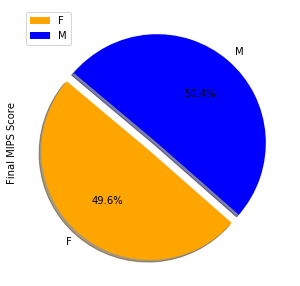

In [58]:
#plot = name of the data frame .plot.pie (sumplots true)
colors = ['orange', 'blue']
explode = (0.1, 0)
plot = physician_gender.plot.pie(y='Final MIPS Score',figsize=(5,5), 
                                 colors = colors, startangle=140, explode = explode, 
                                 shadow = True, autopct="%1.1f%%")


In [63]:
#Group medical schools with .count and Final MIPS Score to determins the datapoints
medsch_FMIPS_data = final_physician.groupby(["Medical School"]).count()["Final MIPS Score"]
medsch_FMIPS_data

Medical School
A T STILL UN, ARIZONA SCHL OF DENT.Y & ORAL HLTH               94
ADIO/PENNSYLVANIA INSTITUTE OF STRAIGHT CHIROPRACTIC            3
ALBANY MEDICAL COLLEGE OF UNION UNIVERSITY                   3970
ALBERT EINSTEIN COLLEGE OF MEDICINE OF YESHIVA UNIVERSITY    5482
AMERICAN MEDICAL MISSIONARY COLLEGE                            13
                                                             ... 
WILLIAMETTE UNIVERSITY MEDICAL DEPARTMENT                       2
WISCONSIN COLLEGE OF PHYSICIANS AND SURGEONS                   24
WOMAN'S MEDICAL COLLEGE                                        10
WRIGHT STATE UNIVERSITY SCHOOL OF MEDICINE                   1990
YALE UNIVERSITY SCHOOL OF MEDICINE                           3509
Name: Final MIPS Score, Length: 371, dtype: int64